###### __DSC630_Predictive Analytics_Fall 2024__


&nbsp;

__Week 11-12 : FINAL PROJECT CODE__
&nbsp;

__Project Title: Low-Voltage Level Power System Modelling__
&nbsp;

__Subtitle : TERM PROJECT CODE FILE__


&nbsp;

__Author : Nage Sayali__
&nbsp;

__Date Created(Ver1) : 9/02/2024__
&nbsp;

__Instructor : Andrew Hua__

&nbsp;

__BELLEVUE UNIVERSITY, NEBRASKA(NE)__

%%latex
\newpage

## Household Data

This dataset is a CSV file that includes 11 households in southern Germany's energy consumption. It records data fields such as Energy in kWh, Energy imported, Total Photovoltaic energy generation, Electric Vehicle charging, and energy consumed by different connected loads.

Link: https://data.open-power-system-data.org/household_data/2020-04-15

The dataset contains entries over a few years ranging from 2014-2020 and provides vital information about residential and small-scale commercial connected load, their energy consumption patterns, and the following key aspects recorded over a 15-minute interval and 60-minute interval respectively

# CASE STUDY - SECTION I

## Preliminary Analysis - Data Cleaning

### Dataset Overview

In [1]:
# Setting up references and libraries required for this exercise
import pandas as pd
import numpy as np
import os
from datetime import datetime

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Getting the current working directory and loading the file 
dirpath = os.getcwd()
filepath_household = dirpath + "/household_data_60min_singleindex.csv"
# DSC630/project/household_data_15min_singleindex.csv
# Loading the data as a pandas data frame 
household_data = pd.read_csv(filepath_household)

household_data

,utc_timestamp,cet_cest_timestamp,DE_KN_industrial1_grid_import,DE_KN_industrial1_pv_1,DE_KN_industrial1_pv_2,DE_KN_industrial2_grid_import,DE_KN_industrial2_pv,DE_KN_industrial2_storage_charge,DE_KN_industrial2_storage_decharge,DE_KN_industrial3_area_offices,...,DE_KN_residential5_refrigerator,DE_KN_residential5_washing_machine,DE_KN_residential6_circulation_pump,DE_KN_residential6_dishwasher,DE_KN_residential6_freezer,DE_KN_residential6_grid_export,DE_KN_residential6_grid_import,DE_KN_residential6_pv,DE_KN_residential6_washing_machine,interpolated
0,2014-12-11T17:00:00Z,2014-12-11T18:00:00+0100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2014-12-11T18:00:00Z,2014-12-11T19:00:00+0100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2014-12-11T19:00:00Z,2014-12-11T20:00:00+0100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2014-12-11T20:00:00Z,2014-12-11T21:00:00+0100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2014-12-11T21:00:00Z,2014-12-11T22:00:00+0100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38449,2019-05-01T18:00:00Z,2019-05-01T20:00:00+0200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38450,2019-05-01T19:00:00Z,2019-05-01T21:00:00+0200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38451,2019-05-01T20:00:00Z,2019-05-01T22:00:00+0200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38452,2019-05-01T21:00:00Z,2019-05-01T23:00:00+0200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Creating a copy of the original dataset for performing data operations
household_df = household_data.copy()
# Printing the contents of the original data frame
household_df.describe().T

,count,mean,std,min,25%,50%,75%,max
DE_KN_industrial1_grid_import,16434.0,221568.888702,149046.252869,0.500,77555.31100,224848.6405,334344.39475,511112.711
DE_KN_industrial1_pv_1,17288.0,4520.493923,3287.334007,0.185,1142.18675,5000.1020,6694.05200,11001.342
DE_KN_industrial1_pv_2,17288.0,3545.317236,2536.370132,0.115,854.38275,3988.0040,5183.13300,8377.523
DE_KN_industrial2_grid_import,11279.0,7997.360582,5129.590383,1.874,3677.47450,6585.1000,13208.76850,16699.016
DE_KN_industrial2_pv,12000.0,10729.835461,7625.982672,0.369,2502.45350,10555.2115,19014.36125,22122.400
...,...,...,...,...,...,...,...,...
DE_KN_residential6_freezer,15346.0,100.862720,34.126877,0.031,93.95700,104.9145,127.33725,146.692
DE_KN_residential6_grid_export,16690.0,2179.055162,1003.708798,0.400,1524.21500,1760.5100,3347.62000,3443.260
DE_KN_residential6_grid_import,21534.0,4208.441767,1841.709971,2.390,3252.77650,4556.0465,5406.05150,7349.309
DE_KN_residential6_pv,21534.0,10043.197610,6587.360861,0.000,3919.89000,9563.7255,16672.46825,20495.400


In [4]:
household_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38454 entries, 0 to 38453
Data columns (total 71 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   utc_timestamp                        38454 non-null  object 
 1   cet_cest_timestamp                   38454 non-null  object 
 2   DE_KN_industrial1_grid_import        16434 non-null  float64
 3   DE_KN_industrial1_pv_1               17288 non-null  float64
 4   DE_KN_industrial1_pv_2               17288 non-null  float64
 5   DE_KN_industrial2_grid_import        11279 non-null  float64
 6   DE_KN_industrial2_pv                 12000 non-null  float64
 7   DE_KN_industrial2_storage_charge     9754 non-null   float64
 8   DE_KN_industrial2_storage_decharge   9754 non-null   float64
 9   DE_KN_industrial3_area_offices       14360 non-null  float64
 10  DE_KN_industrial3_area_room_1        14360 non-null  float64
 11  DE_KN_industrial3_area_room_

### Renaming Datafields

In [5]:
# Creating  a function to remove '\n', ' ' and return dataset after stripping these values
def stripValues(input_df):
    input_df.columns = [x.replace("DE_KN_", "") for x in input_df.columns]
    input_df.columns = [x.replace("residential", "res") for x in input_df.columns]
    input_df.columns = [x.replace("industrial", "ind") for x in input_df.columns]
    input_df.columns = [x.replace("import", "imp") for x in input_df.columns]
    input_df.columns = [x.replace("export", "exp") for x in input_df.columns]

In [6]:
stripValues(household_df)
household_df

,utc_timestamp,cet_cest_timestamp,ind1_grid_imp,ind1_pv_1,ind1_pv_2,ind2_grid_imp,ind2_pv,ind2_storage_charge,ind2_storage_decharge,ind3_area_offices,...,res5_refrigerator,res5_washing_machine,res6_circulation_pump,res6_dishwasher,res6_freezer,res6_grid_exp,res6_grid_imp,res6_pv,res6_washing_machine,interpolated
0,2014-12-11T17:00:00Z,2014-12-11T18:00:00+0100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2014-12-11T18:00:00Z,2014-12-11T19:00:00+0100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2014-12-11T19:00:00Z,2014-12-11T20:00:00+0100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2014-12-11T20:00:00Z,2014-12-11T21:00:00+0100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2014-12-11T21:00:00Z,2014-12-11T22:00:00+0100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38449,2019-05-01T18:00:00Z,2019-05-01T20:00:00+0200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38450,2019-05-01T19:00:00Z,2019-05-01T21:00:00+0200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38451,2019-05-01T20:00:00Z,2019-05-01T22:00:00+0200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38452,2019-05-01T21:00:00Z,2019-05-01T23:00:00+0200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Removing Irrelevant Data

In [7]:
household_df['ind1_pv'] = household_df[['ind1_pv_1', 'ind1_pv_2']].sum(axis = 1)

In [8]:
household_df = household_df[(household_df['utc_timestamp'] >= "2015-12-11T00:00:00Z") & (household_df['utc_timestamp'] < "2017-06-11T00:00:00Z")]
household_df['utc_timestamp'] = pd.to_datetime(household_df['utc_timestamp']).dt.tz_localize(None)

### Arranging data in Standard Format

In [9]:
# pd.to_datetime(household_df["utc_timestamp"], unit = "h")
household_df['utc_timestamp'] = pd.to_datetime(household_df['utc_timestamp']).dt.tz_localize(None)
household_df['date'] = [d.date() for d in household_df['utc_timestamp']]
household_df['time'] = [d.time() for d in household_df['utc_timestamp']]

In [10]:
household_df = household_df[['date','time','ind1_grid_imp','ind1_pv','ind2_grid_imp','ind2_storage_charge','ind2_storage_decharge',
                             'ind3_area_offices','ind3_area_room_1','ind3_area_room_2', 'ind3_area_room_3', 'ind3_area_room_4',
                             'ind3_dishwasher', 'ind3_ev', 'ind3_grid_imp', 'ind3_machine_1','ind3_machine_2', 'ind3_machine_3', 
                             'ind3_machine_4', 'ind3_machine_5','ind3_pv_facade', 'ind3_pv_roof', 'ind3_refrigerator','ind3_ventilation', 
                             'public1_grid_imp', 'public2_grid_imp','res1_dishwasher', 'res1_freezer', 'res1_grid_imp', 'res1_heat_pump',
                             'res1_pv', 'res1_washing_machine', 'res2_circulation_pump','res2_dishwasher', 'res2_freezer', 'res2_grid_imp',
                             'res2_washing_machine', 'res3_circulation_pump', 'res3_dishwasher','res3_freezer', 'res3_grid_exp', 
                             'res3_grid_imp', 'res3_pv','res3_refrigerator', 'res3_washing_machine', 'res4_dishwasher','res4_ev', 
                             'res4_freezer', 'res4_grid_exp', 'res4_grid_imp','res4_heat_pump', 'res4_pv', 'res4_refrigerator',
                             'res4_washing_machine', 'res5_dishwasher', 'res5_grid_imp','res5_refrigerator', 'res5_washing_machine', 
                             'res6_circulation_pump','res6_dishwasher', 'res6_freezer', 'res6_grid_exp', 'res6_grid_imp','res6_pv', 
                             'res6_washing_machine']]
household_df

,date,time,ind1_grid_imp,ind1_pv,ind2_grid_imp,ind2_storage_charge,ind2_storage_decharge,ind3_area_offices,ind3_area_room_1,ind3_area_room_2,...,res5_grid_imp,res5_refrigerator,res5_washing_machine,res6_circulation_pump,res6_dishwasher,res6_freezer,res6_grid_exp,res6_grid_imp,res6_pv,res6_washing_machine
8743,2015-12-11,00:00:00,7178.250,429.900,NaN,NaN,NaN,1899.537,623.859,2999.073,...,322.250,40.572,30.264,53.222,8.361,12.438,NaN,718.092,570.920,7.349
8744,2015-12-11,01:00:00,7195.875,429.900,NaN,NaN,NaN,1900.549,624.019,3000.427,...,322.310,40.573,30.264,53.251,8.361,12.488,NaN,718.327,570.920,7.349
8745,2015-12-11,02:00:00,7210.750,429.900,NaN,NaN,NaN,1901.535,624.187,3001.777,...,322.425,40.634,30.264,53.279,8.361,12.539,NaN,718.582,570.920,7.350
8746,2015-12-11,03:00:00,7227.750,429.900,NaN,NaN,NaN,1902.292,624.349,3003.107,...,322.495,40.650,30.264,53.307,8.361,12.590,NaN,718.782,570.920,7.350
8747,2015-12-11,04:00:00,7247.250,429.900,NaN,NaN,NaN,1903.035,624.509,3004.424,...,322.570,40.668,30.264,53.341,8.361,12.640,NaN,719.228,570.920,7.350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21890,2017-06-10,19:00:00,376510.086,14352.356,NaN,NaN,NaN,NaN,NaN,NaN,...,4444.751,586.136,289.725,609.103,NaN,138.138,2350.97,5318.054,13722.191,76.179
21891,2017-06-10,20:00:00,376526.039,14352.356,NaN,NaN,NaN,NaN,NaN,NaN,...,4444.816,586.140,289.725,609.131,NaN,138.141,2350.99,5318.064,13722.191,76.179
21892,2017-06-10,21:00:00,376540.070,14352.356,NaN,NaN,NaN,NaN,NaN,NaN,...,4444.951,586.218,289.725,609.159,NaN,138.143,2351.00,5318.074,13722.191,76.179
21893,2017-06-10,22:00:00,376555.633,14352.356,NaN,NaN,NaN,NaN,NaN,NaN,...,4445.036,586.241,289.725,609.187,NaN,138.146,2351.00,5318.074,13722.191,76.179


### Treating Null Values

In [11]:
# Creating a function to find the % of missing values in dataframe
# It takes data input, counts the sum of null values in a column, computes its percent value, filters all columns with above 40%, and return the list of columns
def get_NArate(input_data):
    columns = (input_data.isnull().sum() * 100/len(input_data)).sort_values(ascending=False).round(2)
    columns = columns[abs(columns) >= 40]
    print(columns)

In [12]:
get_NArate(household_df)

public2_grid_imp    91.45
res2_freezer        66.71
public1_grid_imp    65.40
dtype: float64


In [13]:
# Dropping ID column and all columns with more than 40% missing data
household_df = household_df.drop(['public2_grid_imp', 'res2_freezer','public1_grid_imp','res4_refrigerator','ind2_storage_charge',
                                  'ind2_storage_decharge','res2_grid_imp','ind3_ev','date','time'], axis = 1)

In [14]:
# Getting the list of columns with numeric data
numcols = household_df.select_dtypes('number').columns.tolist()
# getting the list of columns that have null values and their count
nulcols = household_df[numcols].isna().sum().sort_values(ascending = False)
nulcols

res6_grid_exp            3709
res4_heat_pump           2313
res4_washing_machine     2294
res1_freezer             2166
res1_dishwasher          2166
res1_washing_machine     2166
res1_pv                  2160
res1_heat_pump           2160
res1_grid_imp            2160
res4_dishwasher          1932
res3_grid_imp            1913
res3_grid_exp            1913
res3_pv                  1913
ind2_grid_imp            1873
ind3_grid_imp            1642
res6_dishwasher           227
ind3_machine_4            145
ind3_machine_5            145
ind3_area_offices         145
ind3_area_room_1          145
ind3_area_room_2          145
ind3_area_room_3          145
ind3_area_room_4          145
ind3_dishwasher           145
ind3_machine_1            145
ind3_machine_2            145
ind3_machine_3            145
ind3_ventilation          145
ind3_pv_roof              145
ind3_pv_facade            145
ind3_refrigerator         145
res5_dishwasher             0
res5_grid_imp               0
res5_refri

In [15]:
# # # Using a for loop to find missing values in numeric columns and replace the values with that column's median value
for column in household_df[numcols]:
    median = household_df[numcols].median()
    household_df[numcols] = household_df[numcols].fillna(median)
# Printing the calculated median value of each numeric column
median

ind1_grid_imp            178276.0430
ind1_pv                    8001.6560
ind2_grid_imp              6585.1000
ind3_area_offices          9421.4340
ind3_area_room_1           3573.9540
ind3_area_room_2          16290.9300
ind3_area_room_3           3326.2820
ind3_area_room_4          22074.0210
ind3_dishwasher             481.2610
ind3_grid_imp            472322.6960
ind3_machine_1            22924.1900
ind3_machine_2            76014.3840
ind3_machine_3           113002.8960
ind3_machine_4              250.4810
ind3_machine_5             3275.7790
ind3_pv_facade             4672.8740
ind3_pv_roof              11710.5320
ind3_refrigerator           278.2120
ind3_ventilation         102375.1400
res1_dishwasher             192.3830
res1_freezer                246.2935
res1_grid_imp              5839.6140
res1_heat_pump             5392.8830
res1_pv                   12355.7370
res1_washing_machine        206.8670
res2_circulation_pump       488.0765
res2_dishwasher             319.7580
r

## Exploratory Data Analysis -Data Visualization

### Histogram

In [16]:
# Creating a function that will return a histgram of input variable in the dataframe
# It takes dataframe, and outliers (initially set as true) as input and returns a histogram of the variable

def Create_Hist(input_df, outliers = True):
    # Using for loop to create Histogram for all the columns in the dataframe
    # numcols = input_df.select_dtypes('number').columns.tolist()
    for colname in input_df.columns:
        try:
            # Creating Histograms
            plt.figure(figsize = (8,6))
            plt.hist(input_df[(colname)], color = 'darkslategray', edgecolor = 'black', bins = 20)
            if outliers:
                plt.title(f"Histogram of {colname}(with Outliers)")
            else:
                plt.title(f"Histogram of {colname}(without Outliers)")
            # Creating unique title for each plot
            # plt.title(f"Histogram of {colname} in Energy Overview (merged_energydf) Dataset with Outliers")
            # Setting the x and y label
            plt.xlabel(colname)
            plt.ylabel("Frequency")
            plt.show()
        except ValueError:
            print(f"The {colname} can not be represented as a histogram")
            continue 

In [17]:
# household_df1 = household_df.drop(['date','time'],axis = 1)

In [18]:
# Creating histograms of all data fields in the merged dataframe
# Create_Hist(household_df1)

### Validating Outliers

In [19]:
# # Setting up parameters for the visualization
# sns.set_theme(style='dark', palette='magma')

# # Creating pair plots of the Global energy growth and corresponding CO2 emission
# gplot = sns.pairplot(household_df1, diag_kind='kde', height=4)
# gplot.map_lower(sns.kdeplot, levels=3, color='teal')
# gplot.fig.suptitle('Fig.6.2.3 Overview of Energy Consumption and CO2 Emmisssion with respect to population', y=1)
# plt.show()

In [20]:
# # Creating a function to remove outliers in the input variable if any.
# # It takes dataframe and variable as input and returns cleansed data along with the statistical summary of input variabe
# # It also plots boxplot by identifying and calculating the outliers values
# def eliminateOutliers(input_df1, colname):
#     # Removing the NA values in the field and plotting a boxplot to represent the outliers
#     variab1 =input_df1.loc[:,[colname]].dropna()
#     plt.figure(figsize = (8,6))
#     sns.boxplot(x=input_df1[colname],notch=True)
#     plt.title(f"Boxplot of {colname}")
#     plt.show()
#     # sns.boxplot(data = input_df1, x = variab1, color = "darkslategray").set(title = 'Boxplot')
#     # Calculating First, Third and Inner quartile(difference between first and Third quartile)
#     var_Q1 = variab1.quantile(0.25)
#     var_Q3 = variab1.quantile(0.75)
#     var_IQ = var_Q3-var_Q1
#     print(f"Summary of Outliers in {colname} field")
#     print(f"Inter Quartile range: {var_IQ}")
#     # Calculating the Lower and Upper whiskers to identify the Outliers
#     var_LW = var_Q1-1.5*var_IQ
#     var_UW = var_Q3+1.5*var_IQ
#     print(f"Lower Whisker: {var_LW}, Upper Whisker: {var_UW} ")
#     # Removing the values below lower wiskers and above upper whiskers to exclude the outliers and printing the summary
#     input_df1 = input_df1[variab1 > var_LW]
#     input_df1 = input_df1[variab1 < var_UW]
#     new_variab = input_df1[colname].dropna()
#     print(f"Summary after removing Outliers:\n{new_variab.describe()}")
#     return input_df1

In [21]:
# Passing 'gdp_percapita' to eliminate outliers function and removing the outliers
# household_df = eliminateOutliers(household_df, 'ind1_grid_imp')

# Exploratory Data Analysis

# CASE STUDY - SECTION II

In [22]:
# Setting up references and libraries required for this section
from datetime import datetime

from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, accuracy_score,recall_score,f1_score
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import chi2, f_classif
from sklearn.feature_selection import SelectKBest
from sklearn import tree
from sklearn.pipeline import FeatureUnion
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from lazypredict.Supervised import LazyClassifier
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.exceptions import NotFittedError
from sklearn.dummy import DummyRegressor

import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

## Data Preparation

### Removing Irrelevent Datafields

In [23]:
household_df['energy_imp'] = household_df[['ind1_grid_imp', 'ind2_grid_imp','ind3_grid_imp','res1_grid_imp','res4_grid_imp','res5_grid_imp','res6_grid_imp']].apply(np.sum,axis=1)
household_df['energy_exp'] = household_df[['res3_grid_exp','res3_grid_exp','res4_grid_exp','res6_grid_exp']].apply(np.sum,axis=1)
household_df = household_df.drop(['ind1_grid_imp', 'ind2_grid_imp','ind3_grid_imp','res1_grid_imp','res3_grid_exp','res3_grid_exp','res4_grid_exp',
                                  'res4_grid_imp','res5_grid_imp','res6_grid_exp','res6_grid_imp','ind1_pv','ind3_pv_facade','ind3_pv_roof',
                                  'res1_pv','res3_grid_imp','res3_pv','res4_pv','res6_pv'], axis=1)

In [24]:
selected_cols = household_df[household_df.columns.difference(['date','time','energy_imp','energy_exp'])]

In [25]:
household_df['max_dem'] = selected_cols.apply(np.max,axis=1)
                               
household_df.describe().T

,count,mean,std,min,25%,50%,75%,max
ind3_area_offices,13152.00,9280.69,4070.53,1899.54,5935.66,9421.43,12747.69,16046.57
ind3_area_room_1,13152.00,3447.13,1578.03,623.86,2076.05,3573.95,4811.40,5981.10
ind3_area_room_2,13152.00,16031.62,7309.72,2999.07,9811.36,16290.93,22016.27,28679.35
ind3_area_room_3,13152.00,3164.56,1445.55,618.34,1922.68,3326.28,4359.71,5512.53
ind3_area_room_4,13152.00,22117.28,11032.75,4584.54,12486.29,22074.02,31227.22,42743.02
ind3_dishwasher,13152.00,485.75,230.34,91.14,295.53,481.26,684.58,886.55
ind3_machine_1,13152.00,22573.57,11718.47,4538.45,11730.80,22924.19,32259.79,44637.08
ind3_machine_2,13152.00,74973.08,35849.73,14365.76,43677.04,76014.38,105087.42,136183.01
ind3_machine_3,13152.00,115997.83,56665.68,22647.42,67343.33,113002.90,163776.68,218321.65
ind3_machine_4,13152.00,249.13,103.26,96.26,166.93,250.48,302.50,463.98


In [26]:
household_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13152 entries, 8743 to 21894
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ind3_area_offices      13152 non-null  float64
 1   ind3_area_room_1       13152 non-null  float64
 2   ind3_area_room_2       13152 non-null  float64
 3   ind3_area_room_3       13152 non-null  float64
 4   ind3_area_room_4       13152 non-null  float64
 5   ind3_dishwasher        13152 non-null  float64
 6   ind3_machine_1         13152 non-null  float64
 7   ind3_machine_2         13152 non-null  float64
 8   ind3_machine_3         13152 non-null  float64
 9   ind3_machine_4         13152 non-null  float64
 10  ind3_machine_5         13152 non-null  float64
 11  ind3_refrigerator      13152 non-null  float64
 12  ind3_ventilation       13152 non-null  float64
 13  res1_dishwasher        13152 non-null  float64
 14  res1_freezer           13152 non-null  float64
 15  res1

## Data Extraction and Feature Transformation

In [27]:
cols = household_df[household_df.columns.difference(['date','time'])]
household_demand = cols

In [28]:
# Creating a correlation coefficient matrix and rounding the results to improve readability
energy_mtrx = household_demand.corr().round(2)

In [29]:
# Creating a matrix subset for the column Access to electricity (% of the population)
dem_mtrx=energy_mtrx['max_dem']
# Selecting the data fields that have correlation values greater than 0.6
max_energy_dm = dem_mtrx[abs(dem_mtrx) >= 0.6].reset_index()
# clean_energy = clean_energy
# Creating a list of columns that has correlation values greater than 0.6 
max_dem_cols = max_energy_dm['index']

In [30]:
# Using the list of data field names that have correlation >0.4 to create a new matrix
max_dem_df = household_demand[max_dem_cols]
# Printing the output dataframe
max_dem_df

,energy_exp,energy_imp,ind3_area_offices,ind3_area_room_1,ind3_area_room_2,ind3_area_room_3,ind3_area_room_4,ind3_dishwasher,ind3_machine_1,ind3_machine_2,...,res4_freezer,res4_heat_pump,res4_washing_machine,res5_dishwasher,res5_refrigerator,res5_washing_machine,res6_circulation_pump,res6_dishwasher,res6_freezer,res6_washing_machine
8743,7492.76,490440.46,1899.54,623.86,2999.07,618.34,4584.54,91.14,4538.45,14365.76,...,27.38,472.43,9.79,30.41,40.57,30.26,53.22,8.36,12.44,7.35
8744,7492.76,490459.61,1900.55,624.02,3000.43,618.36,4584.54,91.14,4538.64,14375.99,...,27.40,473.14,9.79,30.41,40.57,30.26,53.25,8.36,12.49,7.35
8745,7492.76,490476.05,1901.54,624.19,3001.78,618.38,4584.54,91.14,4538.82,14386.21,...,27.41,473.84,9.79,30.41,40.63,30.26,53.28,8.36,12.54,7.35
8746,7492.76,490494.55,1902.29,624.35,3003.11,618.39,4584.54,91.14,4539.01,14396.43,...,27.43,474.50,9.79,30.41,40.65,30.26,53.31,8.36,12.59,7.35
8747,7492.76,490515.69,1903.04,624.51,3004.42,618.41,4584.57,91.14,4539.20,14406.60,...,27.45,475.02,9.79,30.41,40.67,30.26,53.34,8.36,12.64,7.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21890,24089.70,878441.64,9421.43,3573.95,16290.93,3326.28,22074.02,481.26,22924.19,76014.38,...,255.47,2203.60,90.03,391.55,586.14,289.73,609.10,47.42,138.14,76.18
21891,24089.72,878458.01,9421.43,3573.95,16290.93,3326.28,22074.02,481.26,22924.19,76014.38,...,255.49,2203.60,90.03,391.55,586.14,289.73,609.13,47.42,138.14,76.18
21892,24089.73,878472.44,9421.43,3573.95,16290.93,3326.28,22074.02,481.26,22924.19,76014.38,...,255.51,2203.60,90.03,391.55,586.22,289.73,609.16,47.42,138.14,76.18
21893,24089.73,878488.31,9421.43,3573.95,16290.93,3326.28,22074.02,481.26,22924.19,76014.38,...,255.54,2203.60,90.03,391.55,586.24,289.73,609.19,47.42,138.15,76.18


In [31]:
# Creating a correlation matrix of the new dataframe and rounding the values
max_dem_mtrx=max_dem_df.corr().round(2)
# max_dem_mtrx

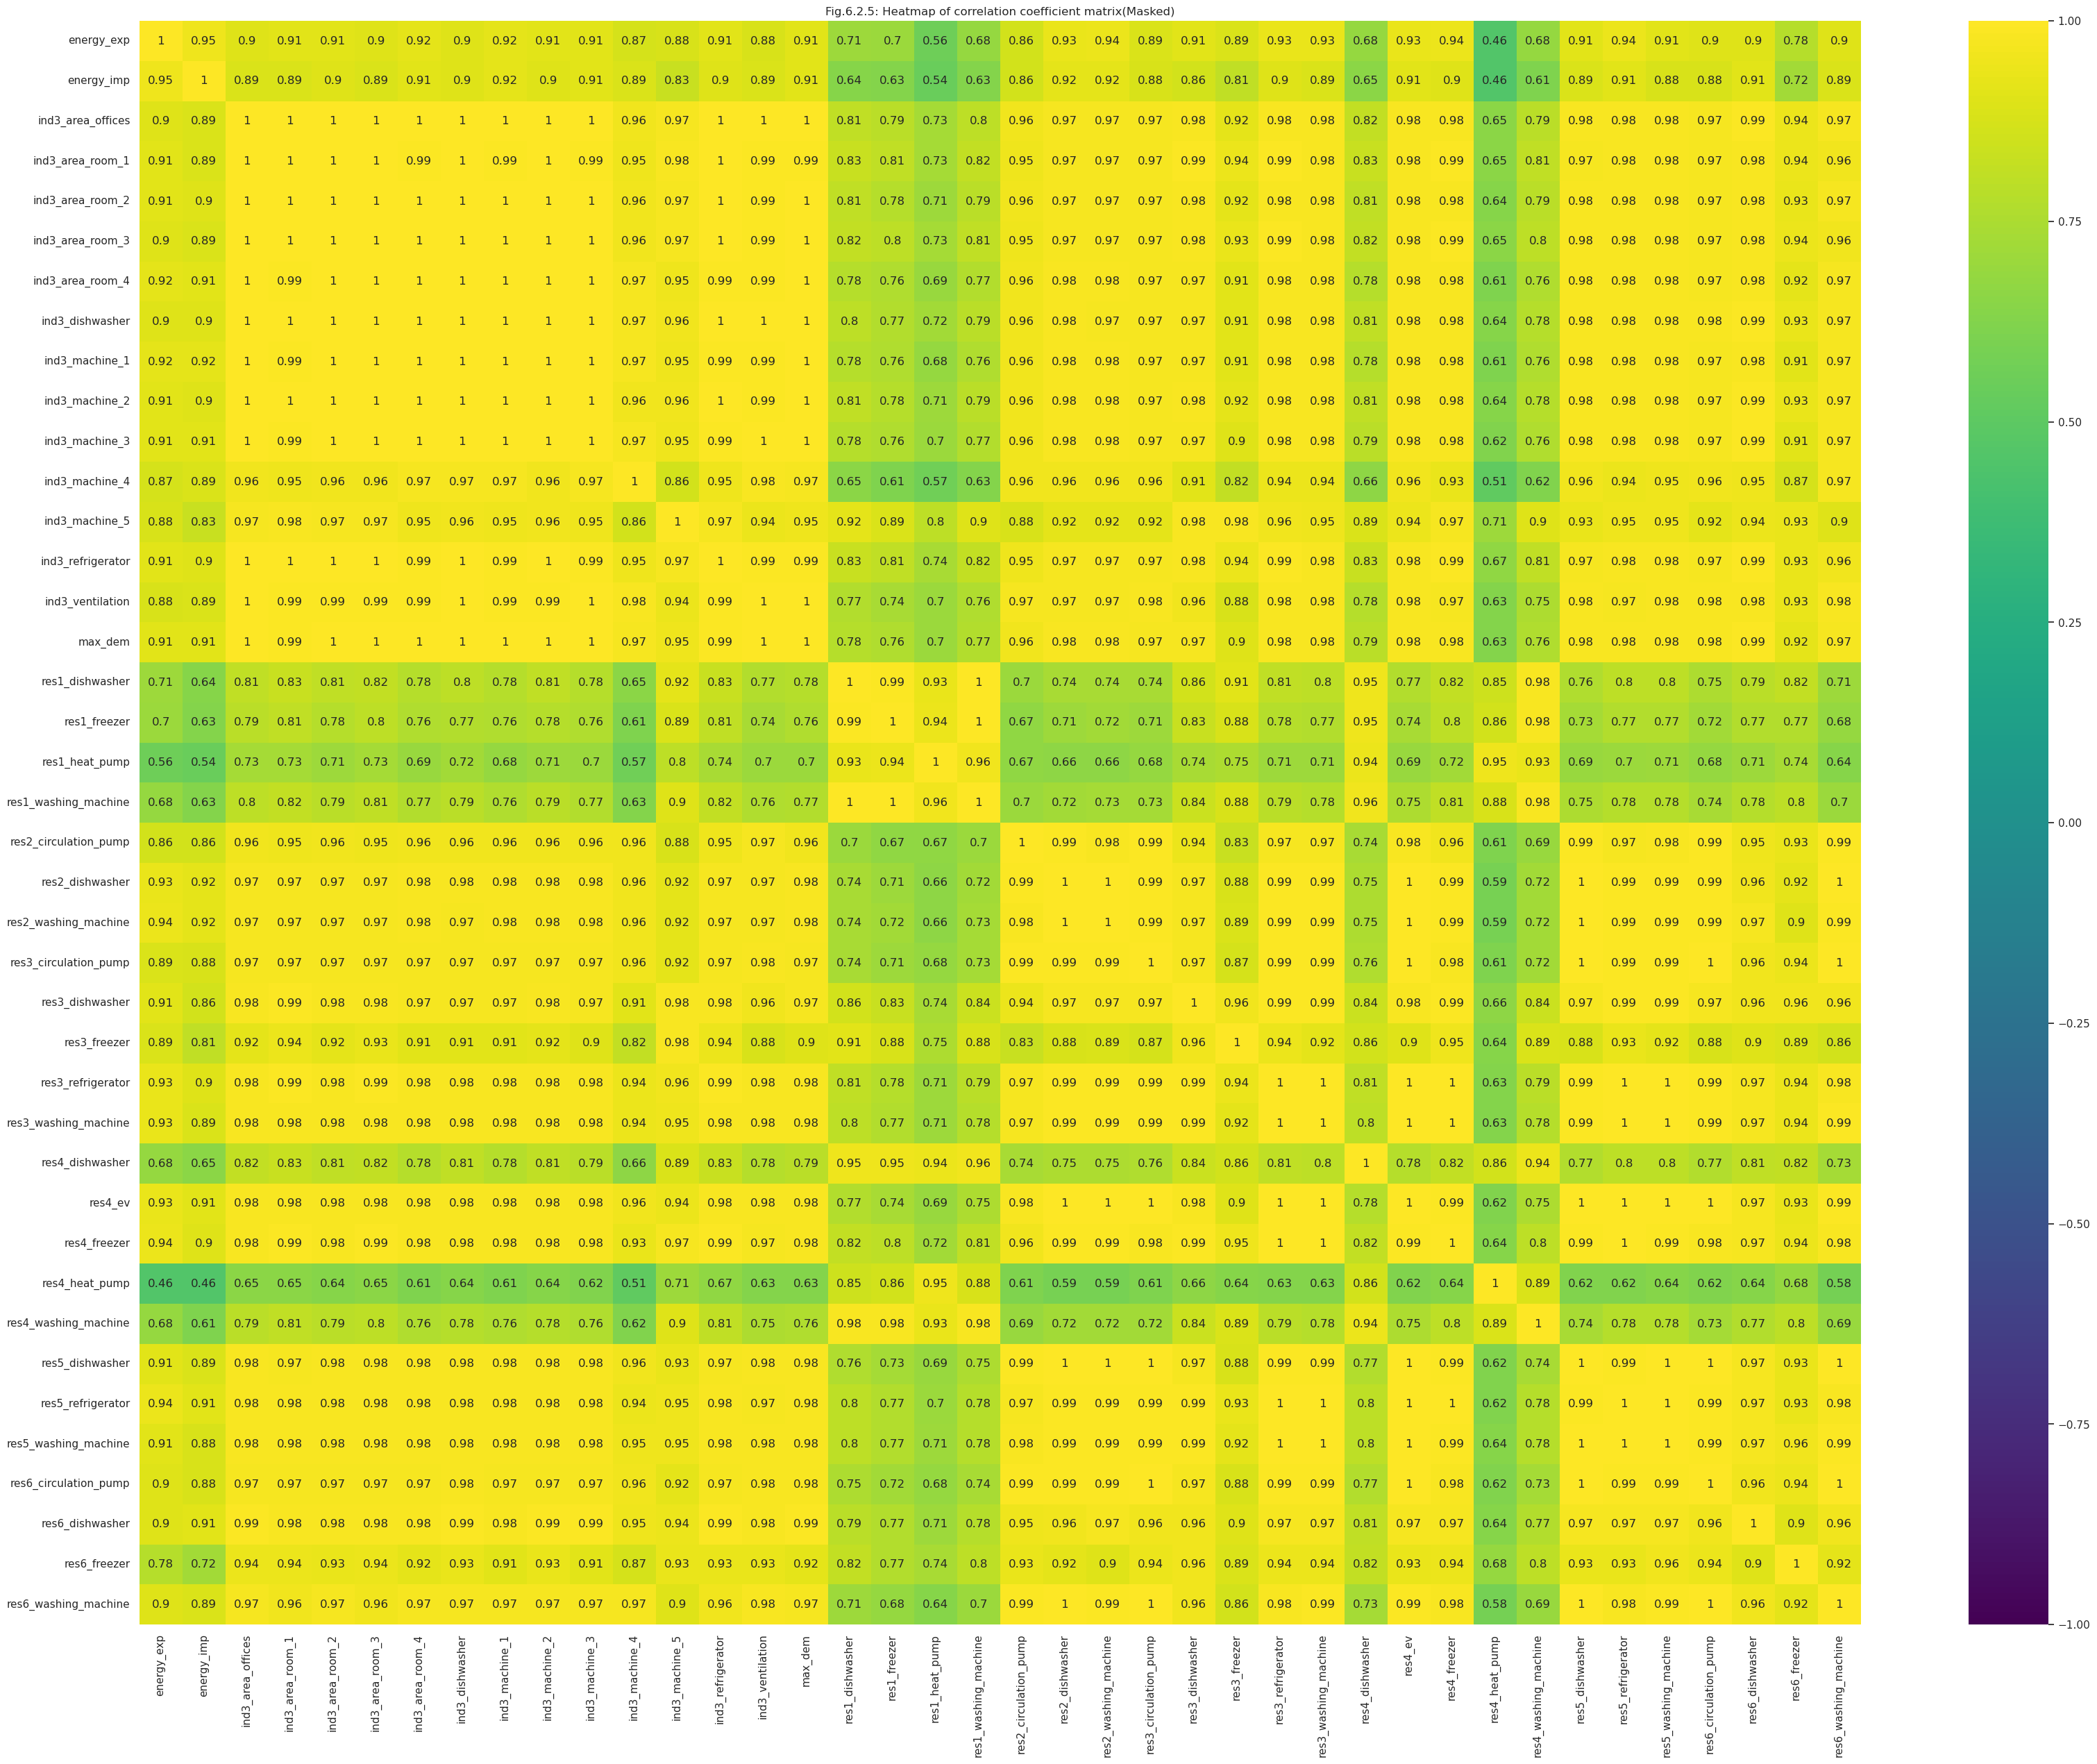

In [32]:
# Setting up parameters for the visualization
sns.set(font_scale=1,rc={"figure.figsize":(40, 30)})

# Creating a heatmap of the correlation coefficient matrix 
sns.heatmap(max_dem_mtrx,annot=True, vmax=1, vmin=-1, center=0, cmap='viridis')
plt.title('Fig.6.2.5: Heatmap of correlation coefficient matrix(Masked)')
plt.savefig('Heatmap of correlation coefficient matrix(Masked).png')
plt.show()

### Dimentionality Reduction & Feature Transformation

In [33]:
# Creating variables for the target and features(target = maximum demand)
features = household_df.drop(['max_dem'],axis=1)
# Assigning 'max_dem' column as the target variable
target = household_df[['max_dem']]
# Printing the dimensions of feature and target
print(f"The shape of features: {features.shape}\nThe shape of target: {target.shape}")

The shape of features: (13152, 39)
The shape of target: (13152, 1)


In [34]:
rnd_num = 47
# randomly splitting the data and target into 75% training data and 25% test data
X_train, X_test, y_train, y_test = train_test_split(features,target, test_size=0.2, random_state=rnd_num)
# Printing the dimensions of training and test data

In [35]:
# Creating a standard scaler object
std_scaler = StandardScaler()

In [36]:
# Applying the standard scaler object to the training set
X_train_scaler = std_scaler.fit_transform(X_train)

In [37]:
# Applying the standard scaler object to the test set
X_test_scaler = std_scaler.transform(X_test)

## Model Building

In [38]:
# Creating a logistic regression model object
linear_model = LinearRegression()

In [39]:
# Using the fit function from scikit-learn to train the logistic regression model on the training data
dem_model = linear_model.fit(X_train, y_train)
# Creating a data frame to examine the model coefficients
pd.DataFrame(dem_model.coef_.T, features.columns, columns = ['dem_coeff']).round(4)

,dem_coeff
ind3_area_offices,-2.37
ind3_area_room_1,-7.12
ind3_area_room_2,0.08
ind3_area_room_3,2.91
ind3_area_room_4,-0.63
ind3_dishwasher,34.74
ind3_machine_1,0.44
ind3_machine_2,0.41
ind3_machine_3,0.70
ind3_machine_4,6.52


In [40]:
# computing the score of the linear regression model
print(linear_model.score(X_test, y_test).round(2))

1.0


In [41]:
# Using the linear regression model to predict the value of the test set
lm_pred_test = linear_model.predict(X_test)

In [42]:
# Creating a function calculates the model metrics for training and testing set (Reusing the function created in exercise 4)
# It takes the predicted values as input and returns the R2, RMSE, MAE and MSE
def Calc_Metrics(test_obj, test_pred):
    # Calculating r Squared using the r2_score function and printing the result
    R2 = r2_score(test_obj, test_pred).round(3)
    print(f"R-Square(R2): {R2}")
    # Calculating Mean absolute error using the mean_absolute_error function and printing the result
    MAE = mean_absolute_error(test_obj, test_pred).round(4)
    print(f"Mean absolute error (MAE): {MAE}")
    # Calculating Mean Squared error using the mean_squared_error function and printing the result
    MSE = mean_squared_error(test_obj, test_pred).round(4)
    print(f"Mean Squared error (MSE): {MSE}")
    # Calculating Root Mean Squared error using the sqrt on mean_squared_error function and printing the result
    RMSE = np.sqrt(mean_squared_error(test_obj, test_pred)).round(4)
    print(f"Root Mean Squared error (RMSE): {RMSE}")
    # F1 = (2×PRE×REC)/(PRE+REC)
    # print(f"F1 Score (F1): {F1}")
    return (R2,MAE,MSE,RMSE)

In [43]:
# Using the metrics function to calculate the R, MAE, MSE, RMSE and displaying the result
print('The calculated metrics for test set using Simple Linear Regression Model are as below:\n')
r2_lm_test, mae_lm_test, mse_lm_test, rmse_lm_test = Calc_Metrics(y_test, lm_pred_test)

The calculated metrics for test set using Simple Linear Regression Model are as below:

R-Square(R2): 1.0
Mean absolute error (MAE): 151.1943
Mean Squared error (MSE): 38221.2091
Root Mean Squared error (RMSE): 195.5025


In [44]:
# Create a PCA object to retain 90% of the variance
pca_obj = PCA(n_components=0.9, whiten=True)

In [45]:
# Applying the PCA object object to the scaled training set
X_train_pca = pca_obj.fit_transform(X_train_scaler)

In [46]:
# Applying the PCA object to the scaled test set
X_test_pca = pca_obj.transform(X_test_scaler)

In [47]:
# Creating a standard scaler object from sklearn preprocessing
std_scaler = StandardScaler()
# Creating a logistic regression model object
linear_regression = LinearRegression()

In [48]:
# Creating a pipeline with a stanadrd scaler and a classifier
pipeline = Pipeline([('standardizer', std_scaler), ('classifier', linear_regression)])

In [49]:
pipeline.fit(X_train_pca,y_train)

Pipeline(steps=[('standardizer', StandardScaler()),
                ('classifier', LinearRegression())])

In [50]:
# Using the KNN classifier model to predict the value of the test set
pred_test = pipeline.predict(X_test_pca)

In [51]:
# computing the accuracy score of the knn classifier
model_accuracy = pipeline.score(X_test_pca, y_test).round(4)
print(f'The Accuracy score of the KNN model on the test test is: {model_accuracy}')

The Accuracy score of the KNN model on the test test is: 0.9749


In [52]:
# Using the metrics function to calculate the R, MAE, MSE, RMSE and displaying the result
print('The calculated metrics for PCA-transformed test set are as below:\n')
r2_lm_test, mae_lm_test, mse_lm_test, rmse_lm_test = Calc_Metrics(y_test, pred_test)

The calculated metrics for PCA-transformed test set are as below:

R-Square(R2): 0.975
Mean absolute error (MAE): 6584.745
Mean Squared error (MSE): 78156293.805
Root Mean Squared error (RMSE): 8840.6048


In [53]:
# Creating a standard scaler object from sklearn preprocessing
std_scaler = StandardScaler()

In [54]:
# Creating a dictionary of regression analysis to be performed on the PCA transformed data
class_dict = {'Simple Linear Regression': LinearRegression(),
              'K-Nearest Neighbor': KNeighborsRegressor(),
              'Decision Tree Classifier': DecisionTreeRegressor(random_state=rnd_num),
              'Gradient Boost Classifier': GradientBoostingRegressor(random_state=rnd_num),
              'Random Forest Classifier': RandomForestRegressor(random_state=rnd_num),
              'Ridge Regression': Ridge(random_state=rnd_num),
              'Lasso Regression': Lasso(random_state=rnd_num),
              'Elastic Net': ElasticNet(random_state=rnd_num)}

In [55]:
# Creating a function to return a pipeline
# It takes the regressor object as an argument and returns a pipeline with a standard scaler and regressor

def build_pipeline(reg_obj):
    pipeline = Pipeline([('standardizer', std_scaler), 
                         ('classifier', reg_obj)])
    return pipeline

In [56]:
# Creating a function to fit the model on the pipeline
# It takes the pipeline as input and returns a trained data
def train_model(pipeline):
    pipeline = pipeline.fit(X_train_pca,y_train)
    return pipeline


In [57]:
# Creating a function to calculate the model accuracy
# It takes pipeline and an argument, calculates the model accuracy and returns the result
def calc_model_accuracy(pipeline):
    model_accuracy = pipeline.score(X_test_pca,y_test).round(2)
    print(f'The accuracy score of the model is : {model_accuracy}')
    return model_accuracy

In [58]:
# Creating a function to calculate to build a pipeline and calculate model accuracy 
# It takes the regressor object as input, builds the pipeline and evaluates model accuracy and metrics, and returns the result

def build_model(reg_obj):
    # building a pipeline with a regressor object
    pipeline_frame = build_pipeline(reg_obj)
    # Training model on the pipeline
    pipeline_frame = train_model(pipeline_frame)
    # Creating a variable for prediction on x test
    pred_test = pipeline_frame.predict(X_test_pca)
    # Calling the function to calculate the metrics
    r2_test, mae_test, mse_test, rmse_test= Calc_Metrics(y_test, pred_test)
    model_accuracy = pipeline_frame.score(X_test_pca,y_test).round(2)
    return r2_test, mae_test, mse_test, rmse_test,model_accuracy

In [59]:
# Creating a function to print the result of the models
# It takes the regressor dictionary as input, uses the build_model function to create and train pipeline and 
# returns the calculated result of the model accuracy score and metrics

reg_result ={}
def pretty_print(reg_dict):
    for method, reg_obj in reg_dict.items():
        print(f'\nPerfoming Regression Analysis using {method} model \n')
        r2_test, mae_test, mse_test, rmse_test, model_accuracy = build_model(reg_obj)
        # modelmodel_accuracy = calc_model_accuracy(reg_obj)
        metrics = {'R2':r2_test,'MAE':mae_test,'MSE':mse_test,'RMSE':rmse_test, 'Accuracy':model_accuracy}
        reg_result[method] = metrics
        print(f'\n\033[1mThe accuracy score of the {method} model is : {model_accuracy} \033[0m')

In [60]:
pretty_print(class_dict)


Perfoming Regression Analysis using Simple Linear Regression model 

R-Square(R2): 0.975
Mean absolute error (MAE): 6584.745
Mean Squared error (MSE): 78156293.805
Root Mean Squared error (RMSE): 8840.6048

The accuracy score of the Simple Linear Regression model is : 0.97 

Perfoming Regression Analysis using K-Nearest Neighbor model 

R-Square(R2): 0.991
Mean absolute error (MAE): 1919.6951
Mean Squared error (MSE): 28799187.5784
Root Mean Squared error (RMSE): 5366.4875

The accuracy score of the K-Nearest Neighbor model is : 0.99 

Perfoming Regression Analysis using Decision Tree Classifier model 

R-Square(R2): 0.981
Mean absolute error (MAE): 2684.5857
Mean Squared error (MSE): 59609491.0051
Root Mean Squared error (RMSE): 7720.7183

The accuracy score of the Decision Tree Classifier model is : 0.98 

Perfoming Regression Analysis using Gradient Boost Classifier model 

R-Square(R2): 0.992
Mean absolute error (MAE): 2151.7818
Mean Squared error (MSE): 23639845.2282
Root Mean Sq

In [61]:
# Creating a data frame of the result to improve readability and printing the resulting df
results_df = pd.DataFrame(reg_result).T.sort_values(by=['R2'],ascending=False).rename_axis('Regression').reset_index()
results_df

,Regression,R2,MAE,MSE,RMSE,Accuracy
0,Gradient Boost Classifier,0.99,2151.78,23639845.23,4862.08,0.99
1,K-Nearest Neighbor,0.99,1919.70,28799187.58,5366.49,0.99
2,Random Forest Classifier,0.99,2315.78,42189939.21,6495.38,0.99
3,Decision Tree Classifier,0.98,2684.59,59609491.01,7720.72,0.98
4,Simple Linear Regression,0.97,6584.74,78156293.81,8840.60,0.97
5,Ridge Regression,0.97,6583.00,78156186.85,8840.60,0.97
6,Lasso Regression,0.97,6584.41,78156269.35,8840.60,0.97
7,Elastic Net,0.87,17031.20,415170995.88,20375.75,0.87


In [62]:

# ax = fig.add_subplot(111) # Create matplotlib axes
# ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

# width = 0.4

# df.amount.plot(kind='bar', color='red', ax=ax, width=width, position=1)
# df.price.plot(kind='bar', color='blue', ax=ax2, width=width, position=0)

# ax.set_ylabel('Amount')
# ax2.set_ylabel('Price')

# plt.show()

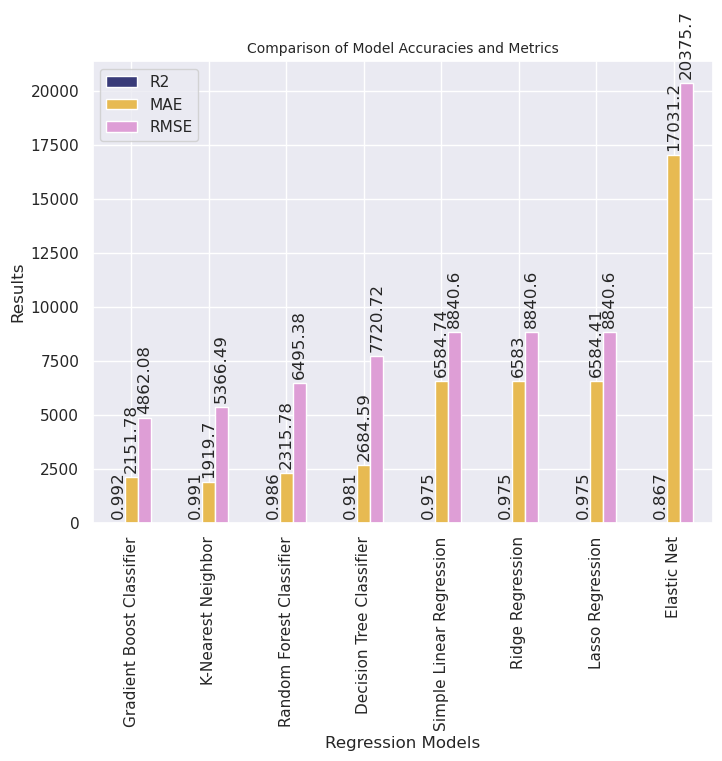

<Figure size 800x600 with 0 Axes>

In [63]:
# Setting up parameters for the visualization
# plt.figure(figsize = (16, 12))
sns.set(rc={'figure.figsize': (8, 6)})
# sns.set(font_scale=1)

# Creating horizontal bar char of Global Per capita Energy Consumption in descending order
ax = results_df[['Regression','R2','MAE','RMSE']].plot(x='Regression', kind='bar', cmap = 'tab20b')
for container in ax.containers:
    ax.bar_label(container, padding=3, rotation=90)

plt.title('Comparison of Model Accuracies and Metrics', fontsize=10)
plt.xlabel('Regression Models')
plt.ylabel('Results')
plt.savefig('Comparison of Model Accuracies and Metrics.png')
plt.show()
plt.savefig('model_results.png')

# References

1.	[A Comprehensive Review of Residential Electricity Load Profile Models](https://www.researchgate.net/publication/348362077_A_Comprehensive_Review_of_Residential_Electricity_Load_Profile_Models)

2.	[Consumption vs. Demand: What’s the Difference?](https://www.energycap.com/resource/consumption-vs-demand-whats-the-difference/)

3.	[Analysing and Projecting Indian Electricity Demand to 2030 by Thomas Spencer, Fellow, TERI, & Associate Fellow, IDDRI Aayushi Awasthy, Associate Fellow, TERI](https://www.teriin.org/sites/default/files/2019-02/Analysing%20and%20Projecting%20Indian%20Electricity%20Demand%20to%202030.pdf)

4.	[Why energy efficiency is so important](https://www.iea.org/news/why-energy-efficiency-is-so-important)

5.	[Data Platform- Household data](https://data.open-power-system-data.org/household_data/2020-04-15)

6.	[Car fuel consumption and emissions 2000-2013](https://data.world/amercader/car-fuel-emissions-2000-2013)

7.	[Food Nutrition Values](https://data.world/awram/food-nutritional-values)	

8.	[Global Superstore Transaction Data (2011-2014)](https://data.world/asepetruk/global-superstore)

9.	[Electricity Explained-Use of electricity](https://www.eia.gov/energyexplained/electricity/use-of-electricity.php)

10.	[Why energy efficiency is so important](https://www.iea.org/news/why-energy-efficiency-is-so-important)
